In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('2024-07-23-washington-post-police-shootings-export.csv')
df.shape

(9893, 12)

In [3]:
df.columns.values

array(['date', 'name', 'age', 'gender', 'armed', 'race', 'city', 'state',
       'flee', 'body_camera', 'signs_of_mental_illness',
       'police_departments_involved'], dtype=object)

In [4]:
df.dtypes


date                            object
name                            object
age                            float64
gender                          object
armed                           object
race                            object
city                            object
state                           object
flee                            object
body_camera                       bool
signs_of_mental_illness           bool
police_departments_involved     object
dtype: object

In [5]:
## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature
## Engineering
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,df['armed'],test_size=0.1,random_state=0)
# this is nothing but splite formula 

X_train.shape, X_test.shape

((8903, 12), (990, 12))

In [6]:
data = df.copy()
data

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"
...,...,...,...,...,...,...,...,...,...,...,...,...
9888,2024-07-13,Daniel Scott McGoldrick,35.0,male,gun,Unknown,Easley,SC,not,False,False,"Easley Police Department, SC"
9889,2024-07-15,NaN,NaN,male,undetermined,Unknown,Graham,WA,other,False,False,"Pierce County Sheriff's Department, WA"
9890,2024-07-15,Steven Kissack,35.0,male,knife,White,Juneau,AK,foot,False,False,"Alaska Wildlife Troopers, AK;Juneau Police Dep..."
9891,2024-07-15,Charles Patrick Carroll,68.0,male,replica,White,Beaumont,TX,not,False,True,"Beaumont Police Department, TX"


In [7]:
# firstlt calculates nan value for numerical
numerical_nan = [feature for feature in data.columns if data[feature].isnull().sum()>0 and data[feature].dtype!='O']
numerical_nan

['age']

In [8]:
percentage = np.round(data[numerical_nan].isnull().sum() / 9892 * 100, 4)
print(f"{percentage.values[0]}%")

3.8819%


In [9]:
data.describe()


,age
count,9509.000000
mean,37.409507
std,12.932616
min,2.000000
25%,28.000000
50%,35.000000
75%,45.000000
max,92.000000


1). 75 percentile (3/4) peoples are killed by police less then 45 year old 

2). There are No such big numbers of outliers beacuse mean and median is more likely to same

3). peoples are killed between the age of 30-45 more

In [10]:
# Handling the missing values
for feature in numerical_nan:
    data[feature] = data[feature].fillna(data[feature].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         9893 non-null   object 
 1   name                         9556 non-null   object 
 2   age                          9893 non-null   float64
 3   gender                       9865 non-null   object 
 4   armed                        9682 non-null   object 
 5   race                         9893 non-null   object 
 6   city                         9821 non-null   object 
 7   state                        9893 non-null   object 
 8   flee                         8548 non-null   object 
 9   body_camera                  9893 non-null   bool   
 10  signs_of_mental_illness      9893 non-null   bool   
 11  police_departments_involved  9892 non-null   object 
dtypes: bool(2), float64(1), object(9)
memory usage: 792.3+ KB


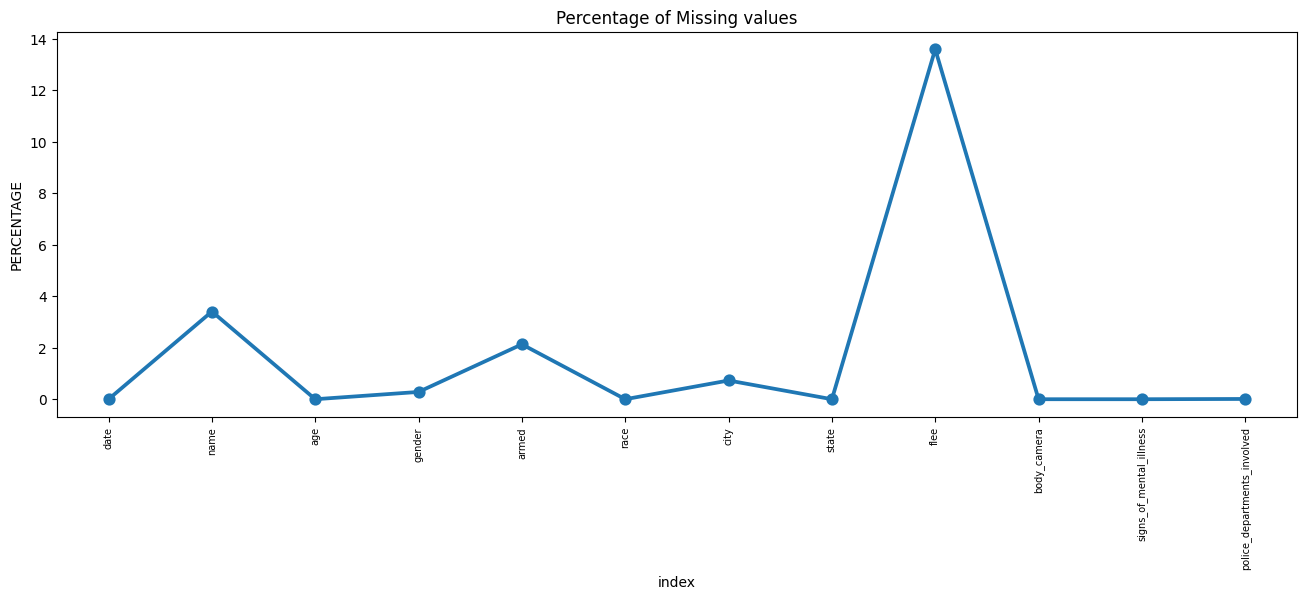

name has 3.4068% Missing values
gender has 0.2831% Missing values
armed has 2.133% Missing values
city has 0.7279% Missing values
flee has 13.5968% Missing values
police_departments_involved has 0.0101% Missing values


In [11]:
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()
cat_nan_features = [feature for feature in data.columns if data[feature].isnull().sum()>0 and data[feature].dtype=='O']
for feature in cat_nan_features:
    print(f"{feature} has {np.round(data[feature].isnull().sum()/9892*100,4)}% Missing values")

In [12]:
categorical_nan = [feature for feature in df.columns if df[feature].isnull().sum()>0 and df[feature].dtype=='O']
categorical_nan

['name', 'gender', 'armed', 'city', 'flee', 'police_departments_involved']

4). There are huge Misssing/Nan values in Flee (The peoples who wants to run) that is 13.5% percentages missing values

In [13]:
df_copy = data.copy()
df_copy['armed'].unique()


array(['gun', 'unarmed', 'other', 'replica', 'knife', 'blunt_object', nan,
       'vehicle', 'undetermined', 'other,gun', 'unknown',
       'blunt_object,blunt_object', 'gun,knife', 'knife,blunt_object',
       'vehicle,gun', 'gun,vehicle', 'replica,vehicle',
       'blunt_object,knife', 'knife,vehicle', 'vehicle,knife,other',
       'knife,knife', 'replica,knife', 'other,blunt_object,knife',
       'other,knife', 'vehicle,knife', 'gun,other', 'blunt_object,other'],
      dtype=object)

In [14]:
# Fill missing values in 'armed' with the mode of the column
df_copy['armed'] = df_copy['armed'].fillna(df_copy.armed.mode())

# Check if there are any missing values left
df_copy['armed'].isnull().sum()

211

In [15]:
df_copy['flee'] = df_copy['flee'].fillna(df_copy.flee.mode())


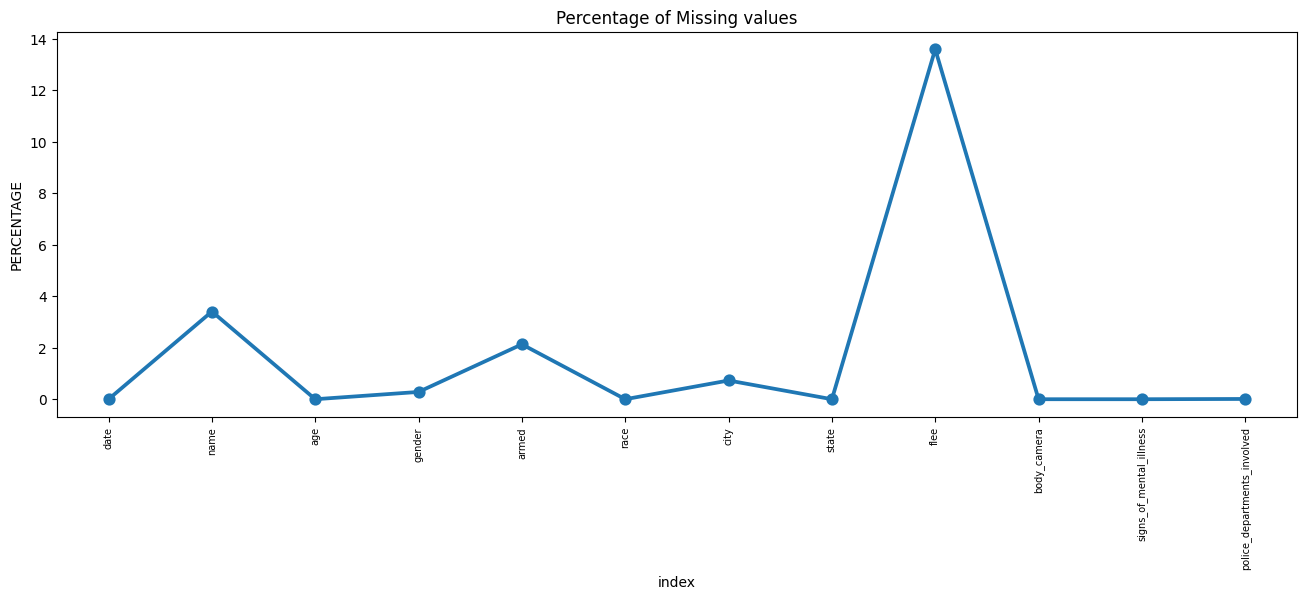

name has 3.4068% Missing values
gender has 0.2831% Missing values
armed has 2.133% Missing values
city has 0.7279% Missing values
flee has 13.5968% Missing values
police_departments_involved has 0.0101% Missing values


In [16]:
missing = pd.DataFrame((df_copy.isnull().sum())*100/df_copy.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()
cat_nan_features = [feature for feature in df_copy.columns if df_copy[feature].isnull().sum()>0 and df_copy[feature].dtype=='O']
for feature in cat_nan_features:
    print(f"{feature} has {np.round(df_copy[feature].isnull().sum()/9892*100,4)}% Missing values")

### Name is no so important let's drop it out

In [17]:
df_copy = df_copy.drop("name", axis='columns')


In [18]:
# The percentage of other categorical nan values is very less less drop the nan rows
update_df = df_copy.dropna(axis=0)
update_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8288 entries, 0 to 9891
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         8288 non-null   object 
 1   age                          8288 non-null   float64
 2   gender                       8288 non-null   object 
 3   armed                        8288 non-null   object 
 4   race                         8288 non-null   object 
 5   city                         8288 non-null   object 
 6   state                        8288 non-null   object 
 7   flee                         8288 non-null   object 
 8   body_camera                  8288 non-null   bool   
 9   signs_of_mental_illness      8288 non-null   bool   
 10  police_departments_involved  8288 non-null   object 
dtypes: bool(2), float64(1), object(8)
memory usage: 663.7+ KB


# Detect Outliers 

In [19]:
# There is only one Numerical column and there men and median is approx similar
update_df.age.describe()

count    8288.000000
mean       37.233176
std        12.672674
min         4.000000
25%        28.000000
50%        36.000000
75%        45.000000
max        92.000000
Name: age, dtype: float64

Mean and Median is same 37 and 36 is most likely to similar that means there is no such outliers......

### Let's confirm by outliers detection methods
like box plot, 3 sigma rule

In [20]:
# we are using 3 sigma rule for finding outliers
def Three_sigma_detect_outliers(df_copy):
    std = np.std(df_copy['age'])
    mean = np.mean(df_copy['age'])
    outliers_cutoff = std*3
    lower_limit = mean-outliers_cutoff
    upper_limit = mean+outliers_cutoff
    outliers = []
    for i, feature in enumerate(df_copy['age']):
        if feature > upper_limit or feature < lower_limit:
            outliers.append(feature)
    return outliers

In [21]:
# Using 3 sigma Rules
Three_sigma_outliers = Three_sigma_detect_outliers(df_copy)
len(Three_sigma_outliers)

71

There is 71 outliers in the age column of dataset let's findout percentage


In [22]:
print(f"Outliers Percentage {len(Three_sigma_outliers)/len(update_df*100)}%")

Outliers Percentage 0.008566602316602317%


The ouliers percntage is very low lets carry it on dataset

For understanding we use box plot technique to see outliers

In [23]:
def Box_plot_detect_outliers(df_copy):
    Q1 = df_copy['age'].quantile(0.25)
    Q3 = df_copy['age'].quantile(0.75)
    IQR = Q3-Q1
    lower_fence= Q1 - 1.5*IQR
    upper_fence= Q3 + 1.5*IQR
    box_plot_outliers = []
    for i, feature in enumerate(df_copy['age']):
        if feature > upper_fence or feature < lower_fence:
            box_plot_outliers.append(feature)
    return box_plot_outliers

In [24]:
# Using Box plot
Box_plot_outliers = Box_plot_detect_outliers(df_copy)
len(Box_plot_outliers)

130

In [25]:
print(f"Outliers Percentage {len(Box_plot_outliers)/len(update_df*100)}%")


Outliers Percentage 0.015685328185328185%


Again the percentage is very low,that means this dataset is close to log normal distribution lets see in histogram

### lets plot a histogram 

<Axes: xlabel='age', ylabel='Count'>

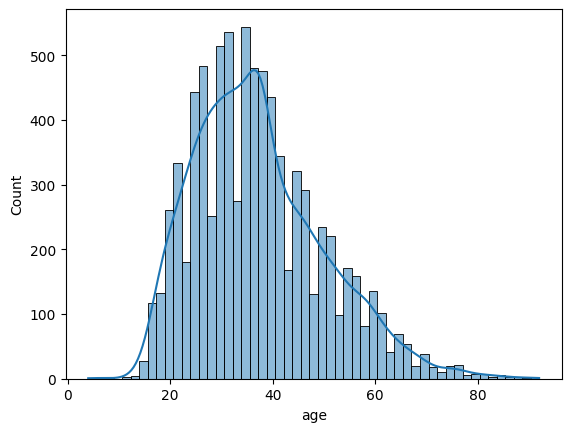

In [26]:
sns.histplot(update_df['age'],kde = True)

Its quite normal distribution lets use log formula to see better result

<Axes: xlabel='age', ylabel='Count'>

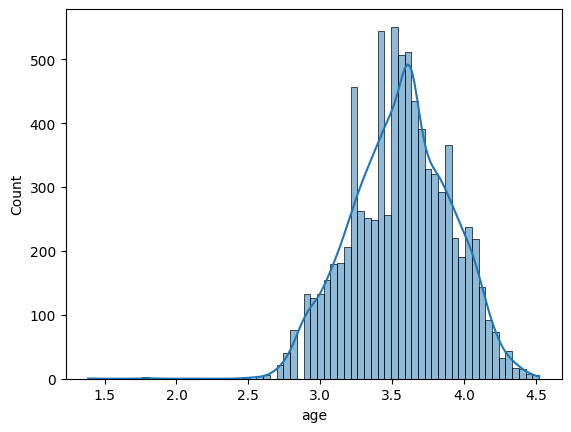

In [27]:
copy = update_df.copy()

copy['age'] = np.log(copy.age)
sns.histplot(copy['age'],kde = True)

# Handing date time varibales
lets convert the age in the years

In [28]:
update_df['date'] = pd.to_datetime(update_df['date'], errors='coerce')
update_df['year'] = update_df['date'].dt.year.astype(float)
update_df

C:\Users\parvp\AppData\Local\Temp\ipykernel_24592\2700761496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_df['date'] = pd.to_datetime(update_df['date'], errors='coerce')
C:\Users\parvp\AppData\Local\Temp\ipykernel_24592\2700761496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  update_df['year'] = update_df['date'].dt.year.astype(float)


,date,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved,year
0,2015-01-02,47.000000,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR",2015.0
1,2015-01-02,53.000000,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA",2015.0
2,2015-01-03,23.000000,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS",2015.0
3,2015-01-04,18.000000,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK",2015.0
4,2015-01-04,39.000000,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO",2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9887,2024-07-13,35.000000,male,knife,Unknown,Tuscaloosa,AL,not,False,False,"Tuscaloosa Police Department, AL",2024.0
9888,2024-07-13,35.000000,male,gun,Unknown,Easley,SC,not,False,False,"Easley Police Department, SC",2024.0
9889,2024-07-15,37.409507,male,undetermined,Unknown,Graham,WA,other,False,False,"Pierce County Sheriff's Department, WA",2024.0
9890,2024-07-15,35.000000,male,knife,White,Juneau,AK,foot,False,False,"Alaska Wildlife Troopers, AK;Juneau Police Dep...",2024.0


In [29]:
update_df.armed.unique()

array(['gun', 'unarmed', 'other', 'replica', 'knife', 'blunt_object',
       'vehicle', 'undetermined', 'other,gun', 'unknown',
       'blunt_object,blunt_object', 'gun,knife', 'knife,blunt_object',
       'vehicle,gun', 'gun,vehicle', 'replica,vehicle',
       'blunt_object,knife', 'knife,vehicle', 'vehicle,knife,other',
       'knife,knife', 'other,blunt_object,knife', 'other,knife',
       'vehicle,knife', 'gun,other', 'blunt_object,other'], dtype=object)

In [35]:
# update_df.to_csv('washington-post-police-shootings-Analysis.csv')

In [37]:
update_df

,date,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved,year
0,2015-01-02,47.000000,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR",2015.0
1,2015-01-02,53.000000,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA",2015.0
2,2015-01-03,23.000000,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS",2015.0
3,2015-01-04,18.000000,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK",2015.0
4,2015-01-04,39.000000,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO",2015.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9887,2024-07-13,35.000000,male,knife,Unknown,Tuscaloosa,AL,not,False,False,"Tuscaloosa Police Department, AL",2024.0
9888,2024-07-13,35.000000,male,gun,Unknown,Easley,SC,not,False,False,"Easley Police Department, SC",2024.0
9889,2024-07-15,37.409507,male,undetermined,Unknown,Graham,WA,other,False,False,"Pierce County Sheriff's Department, WA",2024.0
9890,2024-07-15,35.000000,male,knife,White,Juneau,AK,foot,False,False,"Alaska Wildlife Troopers, AK;Juneau Police Dep...",2024.0


#### upper one is better

# Conclusion
#### 1) Handle Missing Values - 
Data is ready for futher analysis all null values are full

#### 2) No Such Outliers -
There is only one numerical column and in that there is no such outliers 

#### 3) Normal distribution - 
The distibution of data is quite close to Normal distribtion